# Multiple Linear Regression - Cumulative Lab

## Introduction

In this cumulative lab you'll perform an end-to-end analysis of a dataset using multiple linear regression.

## Objectives

You will be able to:

* Prepare data for regression analysis using pandas
* Build multiple linear regression models using StatsModels
* Measure regression model performance
* Interpret multiple linear regression coefficients

## Your Task: Develop a Model of Diamond Prices

<img src="diamond.jpg" alt="Diamond">
Photo by Tahlia Doyle on Unsplash

### Business Understanding

You've been asked to perform an analysis to see how various factors impact the price of diamonds. There are various [guides online](https://www.diamonds.pro/education/diamond-prices/) that claim to tell consumers how to avoid getting "ripped off", but you've been asked to dig into the data to see whether these claims ring true.

### Data Understanding

We have downloaded a diamonds dataset from [Kaggle](https://www.kaggle.com/datasets/shivam2503/diamonds), which came with this description:

* **price** price in US dollars (\$326--\$18,823)
* **carat** weight of the diamond (0.2--5.01)
* **cut** quality of the cut (Fair, Good, Very Good, Premium, Ideal)
* **color** diamond colour, from J (worst) to D (best)
* **clarity** a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
* **x** length in mm (0--10.74)
* **y** width in mm (0--58.9)
* **z** depth in mm (0--31.8)
* **depth** total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
* **table** width of top of diamond relative to widest point (43--95)

### Requirements

#### 1. Load the Data Using Pandas

Practice once again with loading CSV data into a `pandas` dataframe.

#### 2. Build a Baseline Simple Linear Regression Model

Identify the feature that is most correlated with `price` and build a StatsModels linear regression model using just that feature.

#### 3. Evaluate and Interpret Baseline Model Results

Explain the overall performance as well as parameter coefficients for the baseline simple linear regression model.

#### 4. Prepare a Categorical Feature for Multiple Regression Modeling

Identify a promising categorical feature and use `pd.get_dummies()` to prepare it for modeling.

#### 5. Build a Multiple Linear Regression Model

Using the data from Step 4, create a second StatsModels linear regression model using one numeric feature and one one-hot encoded categorical feature.

#### 6. Evaluate and Interpret Multiple Linear Regression Model Results

Explain the performance of the new model in comparison with the baseline, and interpret the new parameter coefficients.

## 1. Load the Data Using Pandas

Import `pandas` (with the standard alias `pd`), and load the data from the file `diamonds.csv` into a DataFrame called `diamonds`.

Be sure to specify `index_col=0` to avoid creating an "Unnamed: 0" column.

In [1]:
# Your code here
import pandas as pd

diamonds = pd.read_csv("diamonds.csv", index_col=0)
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


The following code checks that you loaded the data correctly:

In [2]:
# Run this cell without changes

# diamonds should be a dataframe
assert type(diamonds) == pd.DataFrame

# Check that there are the correct number of rows
assert diamonds.shape[0] == 53940

# Check that there are the correct number of columns
# (if this crashes, make sure you specified `index_col=0`)
assert diamonds.shape[1] == 10

Inspect the distributions of the numeric features:

In [3]:
# Run this cell without changes
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


And inspect the value counts for the categorical features:

In [4]:
# Run this cell without changes
categoricals = diamonds.select_dtypes("object")

for col in categoricals:
    print(diamonds[col].value_counts(), "\n")

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64 

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64 

clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64 



## 2. Build a Baseline Simple Linear Regression Model

### Identifying a Highly Correlated Predictor

The target variable is `price`. Look at the correlation coefficients for all of the predictor variables to find the one with the highest correlation with `price`.

In [5]:
# Your code here - look at correlations
import numpy as np

number_cols = diamonds.select_dtypes(include=[np.number])
price_corr = number_cols.corr()["price"]
price_corr

carat    0.921591
depth   -0.010647
table    0.127134
price    1.000000
x        0.884435
y        0.865421
z        0.861249
Name: price, dtype: float64

Identify the name of the predictor column with the strongest correlation below.

- **Strongest correlation**: The `carat` column has the strongest positive correlation with the `price` column, with a correlation coefficient of **0.921591**.
- **Weakest correlation**: The `depth` column has the weakest correlation with the `price` column, with a correlation coefficient of **-0.010647**.

Correlation strength is determined by the correlation coefficient, which ranges from -1 to 1. Here's a quick guide:

- **Strong correlation**: Coefficients close to -1 or 1 (e.g., -0.8 to -1 or 0.8 to 1).
- **Moderate correlation**: Coefficients around -0.5 to -0.8 or 0.5 to 0.8.
- **Weak correlation**: Coefficients close to 0 (e.g., -0.5 to 0.5).

In [6]:
# Replace None with appropriate code
most_correlated = "carat"

The following code checks that you specified a column correctly:

In [7]:
# Run this cell without changes

# most_correlated should be a string
assert type(most_correlated) == str

# most_correlated should be one of the columns other than price
assert most_correlated in diamonds.drop("price", axis=1).columns

### Plotting the Predictor vs. Price

We'll also create a scatter plot of that variable vs. `price`:

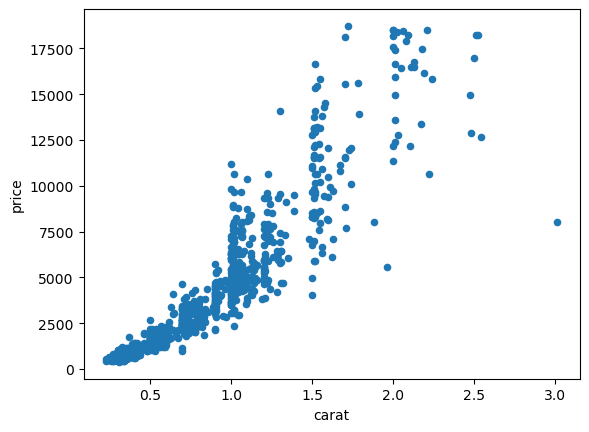

In [8]:
# Run this cell without changes

# Plot a sample of 1000 data points, most_correlated vs. price
diamonds.sample(1000, random_state=1).plot.scatter(x=most_correlated, y="price");

### Setting Up Variables for Regression

Declare `y` and `X_baseline` variables, where `y` is a Series containing `price` data and `X_baseline` is a DataFrame containing the column with the strongest correlation.

In [9]:
# Replace None with appropriate code
y = diamonds["price"]
X_baseline = diamonds[[most_correlated]]

The following code checks that you created valid `y` and `X_baseline` variables:

In [10]:
# Run this code without changes

# y should be a series
assert type(y) == pd.Series

# y should contain about 54k rows
assert y.shape == (53940,)

# X_baseline should be a DataFrame
assert type(X_baseline) == pd.DataFrame

# X_baseline should contain the same number of rows as y
assert X_baseline.shape[0] == y.shape[0]

# X_baseline should have 1 column
assert X_baseline.shape[1] == 1

### Creating and Fitting Simple Linear Regression

The following code uses your variables to build and fit a simple linear regression.

In [11]:
# Run this cell without changes
import statsmodels.api as sm

baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

## 3. Evaluate and Interpret Baseline Model Results

Write any necessary code to evaluate the model performance overall and interpret its coefficients.

In [12]:
# Your code here
print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                 3.041e+05
Date:                Tue, 06 Aug 2024   Prob (F-statistic):               0.00
Time:                        11:47:44   Log-Likelihood:            -4.7273e+05
No. Observations:               53940   AIC:                         9.455e+05
Df Residuals:                   53938   BIC:                         9.455e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2256.3606     13.055   -172.830      0.0

Then summarize your findings below:

In [13]:
# Your written answer here
"""
1. R-squared(0.849): This means that approximately 84.9% of the variability in the dependent variable (price) can be explained 
                        by the independent variable (carat).
2. Adjusted R-squared(0.849): This value is very close to the R-squared, indicating that the model is well-fitted and the addition 
                                of more variables wouldn’t significantly improve the model.

Coefficients
1. Intercept (const:-2256.36):This is the expected value of the dependent variable (price) when all independent variables are zero.
2. Carat(7756.43): For each additional unit of carat, the price increases by approximately 7756.43 units.

Statistical Significance
1. P-values: Both the intercept and carat have p-values of 0.000, which means they are statistically significant at 
                any common significance level (e.g., 0.05).

Model Diagnostics
1. F-statistic(3.041e+05): This indicates that the overall model is statistically significant.
2. Prob (F-statistic: 0.00): This confirms that the model is statistically significant.

Residuals
1. Durbin-Watson(1.991): This value is close to 2, suggesting that there is no significant autocorrelation in the residuals.

Interpretation
- The model explains a significant portion of the variance in price based on carat weight.
- Both the intercept and carat are statistically significant predictors.
- The residuals are not normally distributed, which might affect the model’s assumptions.
""";

<details>
    <summary style="cursor: pointer"><b>Solution (click to expand)</b></summary>

`carat` was the attribute most strongly correlated with `price`, therefore our model is describing this relationship.

Overall this model is statistically significant and explains about 85% of the variance in price. In a typical prediction, the model is off by about &dollar;1k.

* The intercept is at about -\\$2.3k. This means that a zero-carat diamond would sell for -\\$2.3k.
* The coefficient for `carat` is about \\$7.8k. This means for each additional carat, the diamond costs about \\$7.8k more.

</details>    

## 4. Prepare a Categorical Feature for Multiple Regression Modeling

Now let's go beyond our simple linear regression and add a categorical feature.

### Identifying a Promising Predictor

Below we create bar graphs for the categories present in each categorical feature:

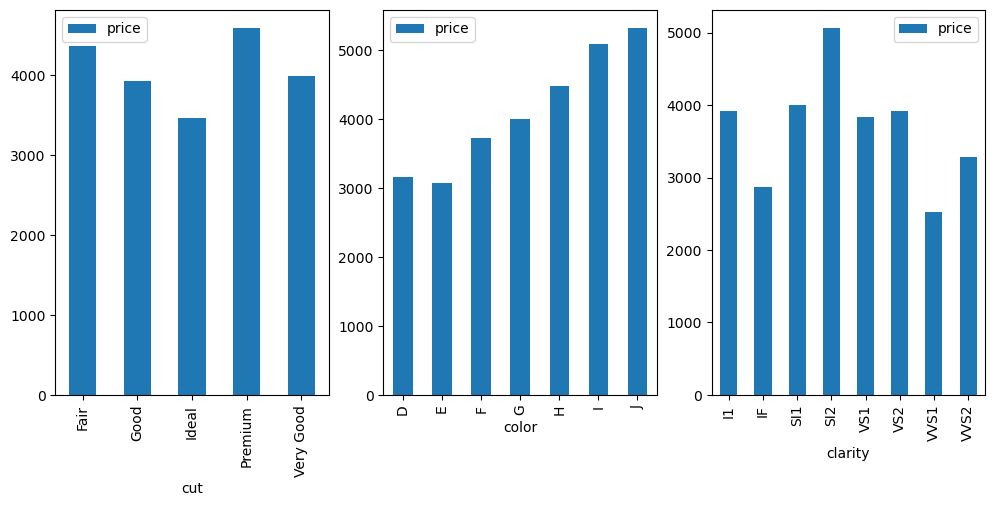

In [14]:
# Run this code without changes
import matplotlib.pyplot as plt

categorical_features = diamonds.select_dtypes("object").columns
fig, axes = plt.subplots(ncols=len(categorical_features), figsize=(12,5))

for index, feature in enumerate(categorical_features):
    diamonds.groupby(feature).mean(numeric_only=True).plot.bar(
        y="price", ax=axes[index])

Identify the name of the categorical predictor column you want to use in your model below. The choice here is more open-ended than choosing the numeric predictor above -- choose something that will be interpretable in a final model, and where the different categories seem to have an impact on the price.

In [15]:
# Replace None with appropriate code
cat_col = "cut"

The following code checks that you specified a column correctly:

In [16]:
# Run this cell without changes

# cat_col should be a string
assert type(cat_col) == str

# cat_col should be one of the categorical columns
assert cat_col in diamonds.select_dtypes("object").columns

### Setting Up Variables for Regression

The code below creates a variable `X_iterated`: a DataFrame containing the column with the strongest correlation **and** your selected categorical feature.

In [17]:
# Run this cell without changes
X_iterated = diamonds[[most_correlated, cat_col]]
X_iterated.head()

,carat,cut
1,0.23,Ideal
2,0.21,Premium
3,0.23,Good
4,0.29,Premium
5,0.31,Good


### Preprocessing Categorical Variable

If we tried to pass `X_iterated` as-is into `sm.OLS`, we would get an error. We need to use `pd.get_dummies` to create dummy variables for `cat_col`.

**DO NOT** use `drop_first=True`, so that you can intentionally set a meaningful reference category instead.

In [18]:
# Replace None with appropriate code

# Use pd.get_dummies to one-hot encode the categorical column in X_iterated
X_iterated = pd.get_dummies(X_iterated)
X_iterated.head()

,carat,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
1,0.23,False,False,True,False,False
2,0.21,False,False,False,True,False
3,0.23,False,True,False,False,False
4,0.29,False,False,False,True,False
5,0.31,False,True,False,False,False


The following code checks that you have the right number of columns:

In [19]:
# Run this cell without changes

# X_iterated should be a dataframe
assert type(X_iterated) == pd.DataFrame

# You should have the number of unique values in one of the
# categorical columns + 1 (representing the numeric predictor)
valid_col_nums = diamonds.select_dtypes("object").nunique() + 1

# Check that there are the correct number of columns
# (if this crashes, make sure you did not use `drop_first=True`)
assert X_iterated.shape[1] in valid_col_nums.values

Now, applying your domain understanding, **choose a column to drop and drop it**. This category should make sense as a "baseline" or "reference". For the "cut_Very Good" column that was generated when `pd.get_dummies` was used, we need to remove the space in the column name.

In [20]:
# Your code here
X_iterated.corr()["carat"]

carat            1.000000
cut_Fair         0.091844
cut_Good         0.034196
cut_Ideal       -0.163660
cut_Premium      0.116245
cut_Very Good    0.009568
Name: carat, dtype: float64

In [21]:
# Drop cut_Ideal since it has the highest negative correlation hence reduce multicollinearity
X_iterated = X_iterated.drop(columns="cut_Ideal")
X_iterated.columns

Index(['carat', 'cut_Fair', 'cut_Good', 'cut_Premium', 'cut_Very Good'], dtype='object')

In [22]:
X_iterated = X_iterated.rename(columns = {'cut_Very Good':'cut_Very_Good'})
X_iterated.columns

Index(['carat', 'cut_Fair', 'cut_Good', 'cut_Premium', 'cut_Very_Good'], dtype='object')

We now need to change the boolean values for the four "cut" column to 1s and 0s in order for the regression to run.

In [23]:
# Your code here
# Create a list of cut columns
cut_columns = ['cut_Fair', 'cut_Good', 'cut_Premium', 'cut_Very_Good']

# Convert the boolean to 1s and 0s
for col in cut_columns:
    X_iterated[col] = X_iterated[col].astype(int)

X_iterated.head()

,carat,cut_Fair,cut_Good,cut_Premium,cut_Very_Good
1,0.23,0,0,0,0
2,0.21,0,0,1,0
3,0.23,0,1,0,0
4,0.29,0,0,1,0
5,0.31,0,1,0,0


Now you should have 1 fewer column than before:

In [24]:
# Run this cell without changes

# Check that there are the correct number of columns
assert X_iterated.shape[1] in (valid_col_nums - 1).values

## 5. Build a Multiple Linear Regression Model

Using the `y` variable from our previous model and `X_iterated`, build a model called `iterated_model` and a regression results object called `iterated_results`.

In [25]:
# Your code here
iterated_model = sm.OLS(y, sm.add_constant(X_iterated))
iterated_results = iterated_model.fit()

## 6. Evaluate and Interpret Multiple Linear Regression Model Results

If the model was set up correctly, the following code will print the results summary.

In [26]:
# Run this cell without changes
print(iterated_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                 6.437e+04
Date:                Tue, 06 Aug 2024   Prob (F-statistic):               0.00
Time:                        11:47:44   Log-Likelihood:            -4.7142e+05
No. Observations:               53940   AIC:                         9.429e+05
Df Residuals:                   53934   BIC:                         9.429e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2074.5457     14.232   -145.769

Summarize your findings below. How did the iterated model perform overall? How does this compare to the baseline model? What do the coefficients mean?

Create as many additional cells as needed.

In [27]:
# Your written answer here
"""
Key Metrics:
1. R-squared (0.856): This means that about 85.6% of the variability in the diamond prices can be explained by the model.
                        This is a high value, indicating a good fit.
2. Adjusted R-squared (0.856): This is almost the same as R-squared, confirming the model’s reliability even after adjusting 
                                for the number of predictors.
3. F-statistic (6.437e+04, p-value: 0.00): This shows that the overall model is statistically significant. The p-value being close to 
                        zero means that at least one of the predictors is significantly related to the price.

Coefficients:
1. Intercept (const: -2074.5457): This is the expected price when all predictors are zero. It’s negative, which might not make 
                                    practical sense but is adjusted by other predictors.
2. carat (7871.0821): For each additional carat, the price increases by approximately $7871.08. This is a strong positive relationship.
3. cut_Fair (-1800.9240): Diamonds with a “Fair” cut are expected to be priced $1800.92 less than the baseline (cut_Ideal).
4. cut_Good (-680.5921): Diamonds with a “Good” cut are expected to be priced $680.59 less than the baseline.
5. cut_Premium (-361.8468): Diamonds with a “Premium” cut are expected to be priced $361.85 less than the baseline.
6. cut_Very_Good (-290.7886): Diamonds with a “Very Good” cut are expected to be priced $290.79 less than the baseline.

Statistical Significance:
1. All p-values for the coefficients are 0.000, indicating that all predictors are statistically significant.

Additional Metrics:
1. Durbin-Watson (1.027): This value tests for autocorrelation in the residuals. Values close to 2 suggest less autocorrelation. 
The value is slightly low, indicating some positive autocorrelation.

Interpretation
- The model explains a significant portion of the variability in diamond prices.
- The carat weight has the strongest positive impact on price.
- Different cuts have varying negative impacts on price compared to the baseline (cut_Ideal).

""";

## 7: Create Partial Regression Plots for Features

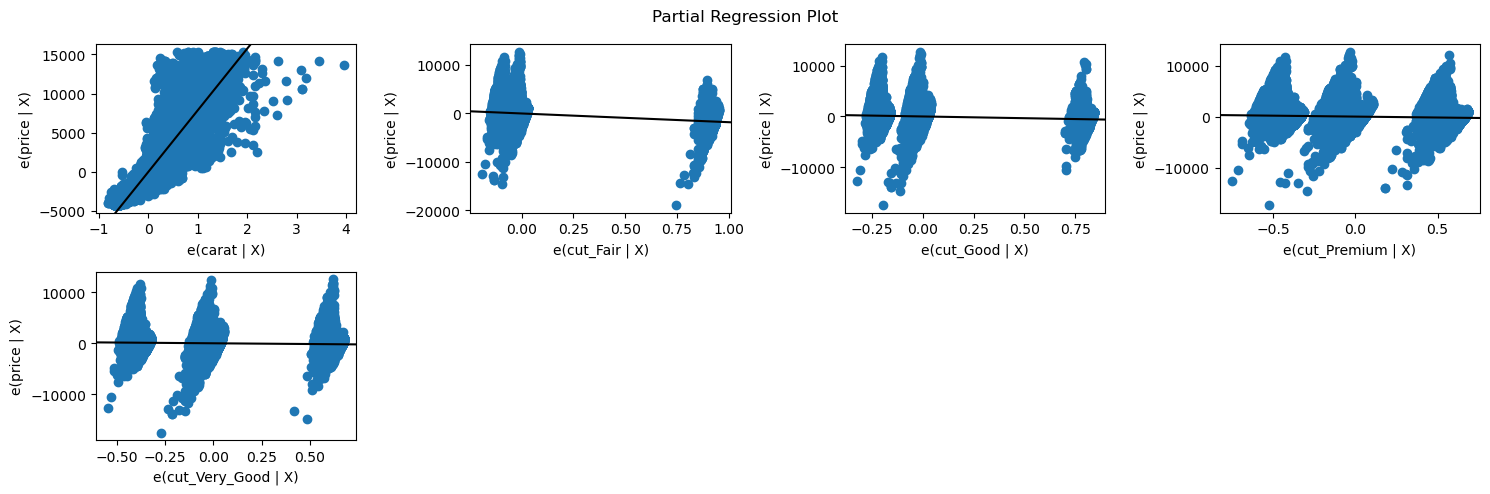

In [28]:
# Your code here
# Visualize partial regression plots
fig = plt.figure(figsize=(15, 5))
sm.graphics.plot_partregress_grid(
    iterated_results,
    exog_idx=list(X_iterated.columns.values),
    grid=(2, 4),
    fig=fig
)
fig.tight_layout()
plt.show()

In [29]:
"""
1. Scatter Plot (elect_Price vs. elect_Carat):
- What it shows: A clear positive correlation between elect_Price and elect_Carat.
- Takeaway: As elect_Price increases, elect_Carat also increases.

2. Partial Regression Plot (elect_K vs. elect_air_K):
- What it shows: Data points scattered around a horizontal line.
- Takeaway: No clear relationship between elect_K and elect_air_K after accounting for other variables.

3. Partial Regression Plot (elect_Price vs. elect_cut_Good):
- What it shows: Similar to the second plot, data points scattered without a clear pattern.
- Takeaway: No apparent relationship between elect_Price  and elect_cut_Good after adjusting for other variables.

4. Partial Regression Plot (elect_Price vs. elect_Premium):
What it shows: Again, no discernible pattern in the data points.
Takeaway: No clear relationship between elect_Price and elect_Premium after accounting for other variables.

5. Partial Regression Plot (elect_Price vs. elect_Very_Good):
What it shows: Data points scattered without a clear pattern.
Takeaway: No obvious relationship between elect_Price and elect_Very_Good after adjusting for other variables.
""";

## Summary

Congratulations, you completed an iterative linear regression process! You practiced developing a baseline and an iterated model, as well as identifying promising predictors from both numeric and categorical features.